# MATH7502 PROJECT: Classification using Least Squares in Julia

### Alex White -- 43218307 

This notebook demonstrates the use of least squares classification in Julia. Least squares classification fits a linear model to data where the outcome is binary (e.g., 0 or 1).

We will use the Iris dataset, specifically focusing on classifying *setosa* versus *non-setosa* Species based on features such as sepal length and petal length. Throughout this notebook, we will explain the mathematical foundation behind least squares classification and implement it step by step in Julia.


## Key Concepts
The goal of least squares classification is to find a linear decision boundary that separates two classes by minimizing the sum of squared errors (SSE). The linear model is defined as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

Where:
- $ y $ is the predicted value (1 for *setosa*, 0 for *non-setosa*).
- $ x_1 $ is the sepal length.
- $ x_2 $ is the petal length.
- $ \beta_0, \beta_1, \beta_2 $ are the coefficients (weights) of the model.


The steps to perform least squares classification are as follows:

1. Represent the data as a matrix $ X $, where each row corresponds to a sample and each column corresponds to a feature.
2. Assign binary labels $ y $ to each sample (e.g., 0 or 1).
3. Compute the weight vector $ \beta $ by solving the least squares problem.

The solution is given by:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$


## Example Situation

Using the Iris dataset, we want to try to demonstrate least squares classification by classifying each data record into setosa or non-setosa. 

The Iris dataset contains features such as Sepal Length, Sepal Width, Petal Length, and Petal Width, which describe the characteristics of the iris flowers. The dataset includes three Species: setosa, versicolor, and virginica. We will classify setosa versus the other two Species to demonstrate the use of least squares classification. This is already accompanied by a classifier of Species, signified by setosa, versicolor, or virginica, for each record. There are 50 records for each Species in the dataset, and we can use this for validating our classification model.

In [1]:
# Load necessary packages
using CSV, DataFrames, MLJ, StatsPlots, LinearAlgebra, Statistics, Random, GLM, RDatasets

First we need to import the data. This can be done using the RDatasets package. 

In [2]:
# Load the iris dataset
iris = dataset("datasets", "iris") |> DataFrame;

# Check the options in the Species column
println(levels(iris.Species))

# Check the summary of the dataset
println(describe(iris))

["setosa", "versicolor", "virginica"]
5×7 DataFrame
 Row │ variable     mean     min     median  max        nmissing  eltype                          
     │ Symbol       Union…   Any     Union…  Any        Int64     DataType                        
─────┼────────────────────────────────────────────────────────────────────────────────────────────
   1 │ SepalLength  5.84333  4.3     5.8     7.9               0  Float64
   2 │ SepalWidth   3.05733  2.0     3.0     4.4               0  Float64
   3 │ PetalLength  3.758    1.0     4.35    6.9               0  Float64
   4 │ PetalWidth   1.19933  0.1     1.3     2.5               0  Float64
   5 │ Species               setosa          virginica         0  CategoricalValue{String, UInt8}


### Cleaning the data.
We want to create a binary label for setosa or non-setosa. We will then extract the features for sepal length and petal length to use as factors in the model. 

In [3]:
# Convert Species labels to binary values (1 for 'setosa', 0 for 'non-setosa')
iris.Species_num = ifelse.(iris.Species .== "setosa", 1, 0)

# Extract features (sepal length and petal length) and labels
X = Matrix(iris[:, ["SepalLength", "PetalLength"]])

# Normalize the features to have zero mean and unit variance
#X = (X .- mean(X, dims=1)) ./ std(X, dims=1)

y = Float64.(iris.Species_num)

# Add a column of ones to X for the intercept term
A = hcat(ones(size(X, 1)), X)

# Display the first few rows of A
A[1:5, :]

5×3 Matrix{Float64}:
 1.0  5.1  1.4
 1.0  4.9  1.4
 1.0  4.7  1.3
 1.0  4.6  1.5
 1.0  5.0  1.4

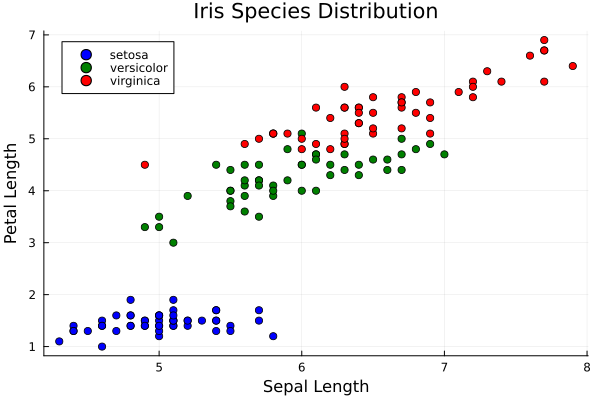

In [4]:
# Visualize all three classes
Species = iris[:, "Species"]
scatter(X[:, 1][Species.=="setosa"], X[:, 2][Species.=="setosa"], label="setosa", color=:blue)
scatter!(X[:, 1][Species.=="versicolor"], X[:, 2][Species.=="versicolor"], label="versicolor", color=:green)
scatter!(X[:, 1][Species.=="virginica"], X[:, 2][Species.=="virginica"], label="virginica", color=:red)
xlabel!("Sepal Length")
ylabel!("Petal Length")
title!("Iris Species Distribution")


## Minimising the sum of squared errors

We aim to fit a linear model to the data to separate the two classes. The model can be written as:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2
$$

Where:
- $y$ is the predicted label (1 for setosa, 0 for non-setosa).
- $x_1$ is the sepal length.
- $x_2$ is the petal length.
- $\beta_0, \beta_1, \beta_2$ are the model coefficients.

Our goal is to find the values of $\beta$ that minimise the sum of squared errors (SSE) between the predicted and actual labels:

$$
SSE = \| A \hat{\beta} - y \|^2
$$

Where:
- $ A $ is the design matrix (with a column of ones for the intercept term).
- $ \hat{\beta} $ is the vector of model coefficients.

The solution can be found using the Moore-Penrose pseudoinverse:

$$
\hat{\beta} = (A^T A)^{-1} A^T y = A^{\dagger}y
$$

In [5]:
# Compute the Moore-Penrose pseudoinverse of A
b_hat = pinv(A) * y

# Split out the beta coefficients into the weight and bias terms
w = b_hat[2:end]
b_0 = b_hat[1]

# Display the weight and bias terms
println("Weight: ", w)
println("Bias: ", b_0)

b_1 = w[1];
b_2 = w[2];


Weight: [0.20703787084377062, -0.33190280275582434]
Bias: 0.37083277412595395


In [6]:
# Display the coefficients
println("b_0: ", b_0)
println("b_1: ", b_1)
println("b_2: ", b_2)

b_0: 0.37083277412595395
b_1: 0.20703787084377062
b_2: -0.33190280275582434


## Coefficient Interpretation

After fitting the least squares model, we obtain the coefficients $b_0$, $b_1$, and $b_2$. These coefficients determine the shape and position of the decision boundary:

- $b_0$ (Intercept): Shifts the decision boundary up or down.
- $b_1$ (Sepal Length Coefficient): Influences how the decision boundary reacts to changes in sepal length.
- $b_2$ (Petal Length Coefficient): Influences how the decision boundary reacts to changes in petal length.

By analyzing the values of $b_1$ and $b_2$, we can assess which feature has more influence on the classification.



## Classification Using the Learned Model

Once we have the model coefficients $ \hat{\beta} $, we can classify new data points. We do this by computing the predicted label $ \hat{y} $ for each data point:

$$
\hat{y} = A \hat{\beta}
$$

We then assign class labels based on the sign of $ \hat{y} $:
- If $ \hat{y} > 0.5 $, we classify the data point as "setosa" (1).
- Otherwise, we classify it as "non-setosa" (0).
    

In [7]:
# Predict the labels based on the learned coefficients
y_hat = A * b_hat

# Classify based on the sign of the predictions
classifications = y_hat .> 0.5

# Display the first few predicted and actual classifications
(classifications[1:5], y[1:5])

(Bool[1, 1, 1, 1, 1], [1.0, 1.0, 1.0, 1.0, 1.0])

Lets check the boundary line.

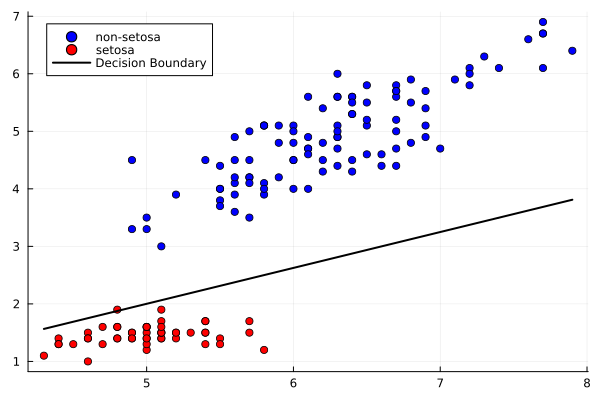

In [11]:
# Plot the data points and the decision boundary
scatter(X[:, 1][y.==0], X[:, 2][y.==0], label="non-setosa", color=:blue)
scatter!(X[:, 1][y.==1], X[:, 2][y.==1], label="setosa", color=:red)


# Decision boundary plot
x_vals = range(minimum(X[:, 1]), maximum(X[:, 1]), length=100)
y_vals = (-(b_1 * x_vals) .+ b_0 ) / b_2
plot!(x_vals, y_vals, label="Decision Boundary", lw=2, color=:black)


Are there any points we missed?

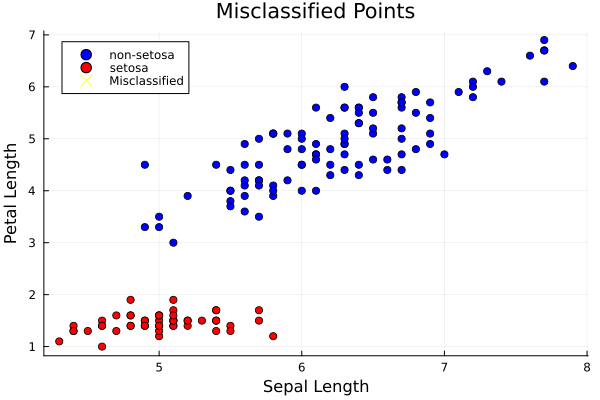

In [9]:
# Check for misclassified points
misclassified = classifications .!= y

scatter(X[:, 1][y.==0], X[:, 2][y.==0], label="non-setosa", color=:blue)
scatter!(X[:, 1][y.==1], X[:, 2][y.==1], label="setosa", color=:red)
scatter!(X[:, 1][misclassified], X[:, 2][misclassified], label="Misclassified", color=:yellow, marker=:x, ms=8)
xlabel!("Sepal Length")
ylabel!("Petal Length")
title!("Misclassified Points")


It doesn't appear so, but let's check the model's accuracy.

In [10]:
# Calculate accuracy
correct_predictions = sum(classifications .== y)
total_predictions = length(y)
accuracy = correct_predictions / total_predictions * 100

println("Model Accuracy: ", accuracy, "%")


Model Accuracy: 100.0%


The plot shows the generated data points and the decision boundary computed using the least squares method. The decision boundary separates the two classes by fitting a line that minimizes the sum of squared errors.

As shown, the model was highly successful, which is likely due to the significantly grouping of the different species with regard to the chosen features. The model was 100% accurate in classifying the points into setosa or non-setosa. 



## Conclusion

In this notebook, we used the Iris dataset to demonstrate least squares classification. We focused on classifying the Species of Iris flowers based on their sepal length and petal length. The decision boundary was computed using the least squares method, and the model successfully classified the data points into two Species.